<center>
    
# 人工智能高阶人才培训班
## 课程作业（二）

---

> 💥说明💥
> 1. 本次作业最晚提交时间： **<font color='red'>2019年6月12日</font>**
> 2. 作业中以`Q-n`标注的几个问题的答案请通过[答题页面](https://app.askform.cn/43245470-5adc-4293-9427-0a33e9743625.aspx?Type=2)连接的Form表格提交，提交中填写的姓名请与本人姓名保持一致；
> 3. 以`Lesson02-HW-{你的名字英文}.ipynb`命名的作业文件请参考[文档](../How-To.md)说明提交到Git的代码仓库；
> 4. 如果完成作业过程中，你有任何新的想法和解题思路，可以完成一篇分享文档(建议用MarkDown撰写)，将根据质量给予⭐奖励
> 5. 🚫 **注意：** 请不要直接编辑该模板文件，建议复制该模板文件生成新的以你自己姓名命名的作业文件（`Lesson02-HW-{你的名字中文}.ipynb`）

### Q1
参考课程中使用`numpy`进行数理统计的过程，使用numpy提供的库`random.normal`生成1万个样本

本题目中使用下表格中**华中地区的女性身高数据**作为参考源

<center>

##### 中国成年人身高，体重均值和标准差的参考值 （2015）
|性别|东北华北|西北|东南|华中|华南|西南|
|-|-|-|-|-|-|-|
|身高，体重|均值，标准差|均值，标准差|均值，标准差|均值，标准差|均值，标准差|均值，标准差|
|男(mm)|1693, 56.6|1684, 53.7|1686, 55,2|1669, 56.3|1650, 57.1|1647, 56.7|
|女(mm)|1586, 51.8|1575, 51.9|1575, 50.8|1560, 50.7|1549, 49.7|1546, 53.9|
|男(kg)|64, 8.2|60, 7.6|59, 7.7|57, 6.9|56, 6.9|55, 6.8|
|女(kg)|55, 7.1|52, 7.1|51, 7.2|50, 6.8|49, 6.5|50, 6.9|


> **注意：**为保证结果的一致性，请每次在你执行随机分布生成之前，使用`np.random.seed(42)`，产生同样的种子值

#### 问： 你生成的分布的实际产生的方差、均值、中位数各是多少(保留两位小数)？
- 50.70, 1560.01, 1575.91
- 50.87, 1560, 1560.69
- 2588.06, 1559.89, 1559.87
- 50.87, 1559.89, 1559.87

In [73]:
import numpy as np
np.random.seed(42)

# your code
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
height = np.random.normal(1560,50.7,10000)

print(height)
height_var = np.var(height,dtype=np.float32)        # 身高方差 
height_mean = np.mean(height,dtype=np.float32)      # 身高均值
height_median = np.median(height)  # 身高中位数
print(type(height))
print(height_var,height_mean,height_median)

[ 1585.18  1552.99  1592.84 ...  1524.24  1585.14  1592.67]
<class 'numpy.ndarray'>
2588.062 1559.8917 1559.868434727301


## Q2-Q9
Q2-Q9将使用kaggle入门中常使用的泰坦尼克数据集，详情可以访问[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)，为了方便处理我们已经对原始数据进行了初步的处理（如缺失值、异常值等）。

在这一系列题目中，我们将综合使用`numpy`, `pandas`和`matplotlib`解决一个泰坦尼克号数据的初步分析问题。在机器学习中，通过多种不同的方式对数据进行分析有助于及时捕获数据特征和数据之间的关联。

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

首先我们使用pandas导入数据

In [17]:
data = pd.read_csv('../data/titanic_train.csv',
                  index_col='PassengerId')

查看数据结构和基本组成

In [18]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


每个字段的含义如下：

| **Variable** | **Definition**                             | **Key**                                        |
| ------------ | ------------------------------------------ | ---------------------------------------------- |
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


In [19]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


为了让大家快速熟悉pandas，我们准备了几个简单的操作：

1. 让我们尝试从乘客中过滤只显示通过Cherbourg(Embarked=C) 登陆并且付费大于200磅（fare > 200）：

In [20]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


2. 我们可以使用`sort_values`降序排列这些数据，排序关键字通过`by`字段定义

In [27]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,2.0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2.0
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,2.0
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1.0
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1.0


3. 我们来尝试在数据中添加一个新的特征（一个新的column）

In [22]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

In [23]:
age_categories = [age_category(age) for age in data.Age]
data['Age_category'] = age_categories

另一种实现方法是通过`.apply`函数实现
```python
data['Age_category'] = data['Age'].apply(age_category)
```

你可以通过`data.head()`命令查看新的数据的情况

In [24]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0


### **Q2. 船上有多少男性和女性？**
- 412 男性 479 女性
- 314 男性 577 女性
- 479 男性 412 女性
- 577 男性 314 女性

In [52]:
# 在此编写代码回答问题
#
(data.Sex == 'male').value_counts()


True     577
False    314
Name: Sex, dtype: int64

### **Q3. 当时船上有多少男性持有二级船票（Pclass=2）？**
- 104
- 108
- 112
- 125

In [70]:
# 在此编写代码回答问题
#
newdata = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]
#dict(newdata[1].value_counts())
newdata.shape

(108, 12)

### **Q4. 所有乘客Fare的中位数和标准差是多少？（保留两位小数）**
- 中位数为 14.45, 标准差为 49.69
- 中位数为 15.1, 标准差为 12.15
- 中位数为 13.15, 标准差为 35.3
- 中位数为  17.43, 标准差为 39.1

In [78]:
# 在此编写代码回答问题
#
data = pd.read_csv('../data/titanic_train.csv',
                  index_col='PassengerId')
a = data['Fare']
fare_median = np.median(a)
fare_std = np.std(a)
print(fare_median,fare_std)

14.4542 49.66553444477411


### **Q5. 幸存者的平均年龄是否高于最终死亡的乘客?**
- Yes
- No

> Tips: 可以参考pandas的`groupby`命令

In [82]:
# 在此编写代码回答问题
#
data_survived = data['Age'].groupby(data['Survived'])
print(data_survived.mean())

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


### **Q6.年龄小于30岁的乘客是否比年龄大于60岁的乘客有更大的存活概率？ 存活概率各为多少？**
- 年轻人为22.7%，年长者为40.6% 
- 年轻人为40.6%， 年长者为22.7%
- 年轻人为35.3%，年长者为27.4%
- 年轻人为27.4%，年长者为35.3%

> Tips: 可以查看 pandas.crosstab()函数的用法

In [104]:
# 在此编写代码回答问题 young = 
#
#pdata = pd.crosstab(data['Age'],data['Survived'])
#print(pdata)
#newpdata = pdata
youngdata = data[data['Age'] < 30]
olddata = data[data['Age'] > 60]
youngcounts = (youngdata.Survived == 1).value_counts()
print(youngcounts)
oldcounts = (olddata.Survived == 1).value_counts()
print(oldcounts)
young = 156/(156+228)
old = 5/(5+17)
print(young,old)

False    228
True     156
Name: Survived, dtype: int64
False    17
True      5
Name: Survived, dtype: int64
0.40625 0.22727272727272727


### **Q7. 女性是否比男性有更大的存活概率? 男性与女性存活人数各占所在性别的百分之多少？**
- 男性为30.2%, 女性为46.2%
- 男性为35.7%, 女性为74.2%
- 男性为21.1%, 女性为46.2%
- 男性为18.9%, 女性为74.2%

In [107]:
# 在此编写代码回答问题
#
maledata = data[data['Sex'] == 'male']
femaledata = data[data['Sex'] == 'female']
malecounts = (maledata.Survived == 1).value_counts()
print(malecounts)
femalecounts = (femaledata.Survived == 1).value_counts()
print(femalecounts)
male = 109/(468+109)
female = 233/(233+81)
print(male,female)

False    468
True     109
Name: Survived, dtype: int64
True     233
False     81
Name: Survived, dtype: int64
0.18890814558058924 0.7420382165605095


### **Q8. 男性乘客中最受欢迎的名字是什么？**
- Charles
- Thomas
- William
- John

> Tips： 请对照给出的几个选项了解名字出现的位置

In [163]:
# 在此编写代码回答问题
#
col= data.iloc[:,2]
array = col.values
print(len(array))
C = 0
for i in range(len(array)):
    if 'Charles' in array[i]:
        C = C+1
T = 0
for i in range(len(array)):
    if 'Thomas' in array[i]:
        T = T+1
W = 0
for i in range(len(array)):
    if 'William' in array[i]:
        W = W+1
J = 0
for i in range(len(array)):
    if 'John' in array[i]:
        J = J+1
print(C,T,W,J)

891
24 22 69 52


### **Q9. 男性/女性的平均年龄与`Pclass`的关系，如下声明正确的是(多选)：**
- 平均而言，一级仓中的男性年龄平均超过40岁
- 一级仓中女性的平均年龄超过40岁
- 所有不同级别仓中男性的平均年龄都大于同一级仓中的女性
- 平均而言，一级仓乘客年龄大于二级票仓，二级仓大于三级票仓

41.28138613861386 30.74070707070707 26.507588932806325
34.61176470588235 28.722972972972972 21.75


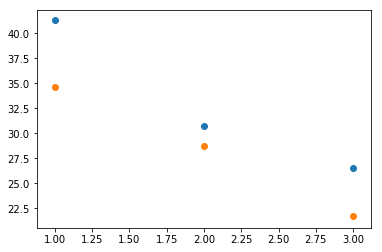

In [131]:
# 在此编写代码回答问题
#
Mdata1 = data[(data['Sex'] == 'male') & (data['Pclass'] == 1)].Age.mean()
Mdata2 = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)].Age.mean()
Mdata3 = data[(data['Sex'] == 'male') & (data['Pclass'] == 3)].Age.mean()
print(Mdata1,Mdata2,Mdata3)
Fdata1 = data[(data['Sex'] == 'female') & (data['Pclass'] == 1)].Age.mean()
Fdata2 = data[(data['Sex'] == 'female') & (data['Pclass'] == 2)].Age.mean()
Fdata3 = data[(data['Sex'] == 'female') & (data['Pclass'] == 3)].Age.mean()
print(Fdata1,Fdata2,Fdata3)
 
Pclass = [1, 2, 3]      
Male = [Mdata1,Mdata2,Mdata3]
Female = [Fdata1,Fdata2,Fdata3]
plt.scatter(Pclass,Male)
plt.scatter(Pclass,Female)
plt.show()